In [ ]:
"""
Can you build a multivariate linear regression model that can predict the product sales based on the advertising budget allocated to different channels. The features are TV Budget ($),Radio Budget ($),Newspaper Budget ($) and the output is Sales (units)
The dataset is give below
TV Budget ($),Radio Budget ($),Newspaper Budget ($),Sales (units)
230.1,37.8,69.2,22.1
44.5,39.3,45.1,10.4
17.2,45.9,69.3,9.3
151.5,41.3,58.5,18.5
180.8,10.8,58.4,12.9
8.7,48.9,75.0,7.2
57.5,32.8,23.5,11.8
120.2,19.6,11.6,13.2
144.1,16.0,40.3,15.6
111.6,12.6,37.9,12.2
"""

## step 1: import the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Step 2: convert the data into dataframe

In [5]:
data = {"TV Budget ($)": [230.1, 44.5, 17.2, 151.5, 180.8, 8.7, 57.5, 120.2, 144.1, 111.6], 
"Radio Budget ($)": [37.8, 39.3, 45.9, 41.3, 10.8, 48.9, 32.8, 19.6, 16.0, 12.6],
"Newspaper Budget ($)": [69.2, 45.1, 69.3, 58.5, 58.4, 75.0, 23.5, 11.6, 40.3, 37.9],
"Sales (units)": [22.1, 10.4, 9.3, 18.5, 12.9, 7.2, 11.8, 13.2, 15.6, 12.2]}
df = pd.DataFrame(data)



In [6]:
print(df)

   TV Budget ($)  Radio Budget ($)  Newspaper Budget ($)  Sales (units)
0          230.1              37.8                  69.2           22.1
1           44.5              39.3                  45.1           10.4
2           17.2              45.9                  69.3            9.3
3          151.5              41.3                  58.5           18.5
4          180.8              10.8                  58.4           12.9
5            8.7              48.9                  75.0            7.2
6           57.5              32.8                  23.5           11.8
7          120.2              19.6                  11.6           13.2
8          144.1              16.0                  40.3           15.6
9          111.6              12.6                  37.9           12.2


## Step 3: splitting it to input and output


In [7]:
inputX = df[["TV Budget ($)", "Radio Budget ($)", "Newspaper Budget ($)"]]
outputY = df["Sales (units)"] 
input_train, input_test, output_train, output_test = train_test_split(inputX, outputY, test_size=0.2, random_state=42)


         

## Step 4: selecting the simple Linear Regression model

In [8]:
model = LinearRegression()
print("\nThe parameters of the model are\n\n",model.get_params())

print("\nThe model we are using is ", model.fit(input_train, output_train))


The parameters of the model are

 {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False, 'tol': 1e-06}

The model we are using is  LinearRegression()


## Step 5 : Testing or Model prediction using testinput

In [10]:

testinput = np.array([[150, 30, 40]])
testinput = np.array([[111.6 ,12.6 ,37.9]])
predicted_output = model.predict(testinput)

print("\nThe predicted output for the input", testinput, "is", predicted_output)
print("\nThe model score is", model.score(input_test, output_test))
print("\nThe coefficients of the model are", model.coef_)
print("\nThe intercept of the model is", model.intercept_)         


The predicted output for the input [[111.6  12.6  37.9]] is [10.61828183]

The model score is 0.6442358724892807

The coefficients of the model are [ 0.07039746  0.19752163 -0.06075034]

The intercept of the model is 2.5755906479631854


c:\genai\gen3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### step 6: Visualising the training results

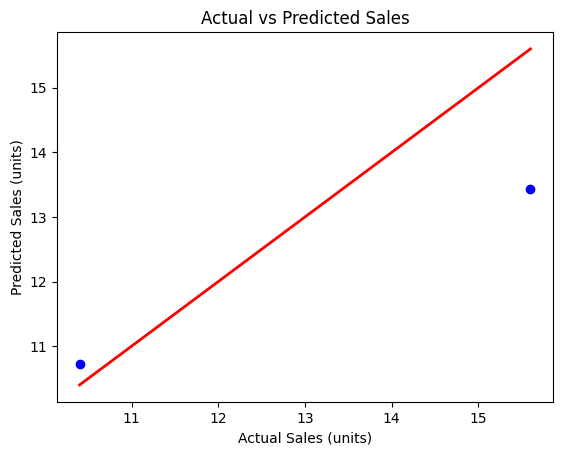

In [15]:
# Plotting the results
plt.scatter(output_test, model.predict(input_test), color='blue')   
plt.xlabel('Actual Sales (units)')
plt.ylabel('Predicted Sales (units)')       
plt.title('Actual vs Predicted Sales')
plt.plot([output_test.min(), output_test.max()], [output_test.min(), output_test.max()], color='red', lw=2)  # Diagonal line
plt.show()

In [ ]:
# Save the model if needed
import joblib
joblib.dump(model, 'sales_prediction_model.pkl')